# ALK Analiza Danych (projekt w Python) - Grzegorz Stasiak and Rafał Podmanicki

## ...) Ładowanie danych i ich preview

In [71]:
### Preparing environment ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [72]:
### Loading .csv file ###

def load_csv_file():
    # Initialize Tkinter and hide the root window
    root = Tk()
    root.withdraw()
    root.title("Select CSV File")
    
    # Open the file dialog to select a file
    file_path = askopenfilename(
        title="Select a CSV file",
        filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
    )
    
    if not file_path:
        print("No file selected. Exiting.")
        return None
    
    # Try to load the CSV file
    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None
    
# Call the function and display the loaded DataFrame if successful
if __name__ == "__main__":
    dataframe = load_csv_file()

File loaded successfully!


In [73]:
### Data preview ###
print(dataframe.head(10))
print(dataframe.columns)

             ACCIDENT DATE ACCIDENT TIME    BOROUGH ZIP CODE   LATITUDE  \
0  2019-08-05T00:00:00.000         16:30     QUEENS    11434  40.676052   
1  2019-08-27T00:00:00.000         16:02   BROOKLYN    11225  40.657780   
2  2019-08-15T00:00:00.000         17:57  MANHATTAN    10002  40.718143   
3  2019-08-30T00:00:00.000         21:53      BRONX    10460  40.840534   
4  2019-08-06T00:00:00.000          9:45  MANHATTAN    10016  40.745440   
5  2019-08-29T00:00:00.000         12:28   BROOKLYN    11222  40.726524   
6  2019-08-31T00:00:00.000          2:16     QUEENS    11434  40.667522   
7  2019-08-11T00:00:00.000         22:23        NaN      NaN  40.858210   
8  2019-08-02T00:00:00.000         16:30     QUEENS    11434  40.666492   
9  2019-08-21T00:00:00.000         17:30      BRONX    10452  40.837720   

   LONGITUDE                                           LOCATION  \
0 -73.790184  {'type': 'Point', 'coordinates': [-73.790184, ...   
1 -73.951096  {'type': 'Point', 'coordin

# 1) Określenie najniebezpieczniejszych czynników wypadków w każdej z dzielnic NY 

In [74]:
# narrowing the columns scope to clean the data
selected_columns = ['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',]
df_t1 = dataframe[selected_columns]
df_t1.head(10)

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,QUEENS,Passing Too Closely,Unspecified,NaN,NaN,NaN
1,BROOKLYN,Passing Too Closely,Unspecified,NaN,NaN,NaN
2,MANHATTAN,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
3,BRONX,Unspecified,Unspecified,NaN,NaN,NaN
4,MANHATTAN,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN
5,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN
6,QUEENS,Unspecified,NaN,NaN,NaN,NaN
7,NaN,Unsafe Speed,Unspecified,NaN,NaN,NaN
8,QUEENS,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN
9,BRONX,Unspecified,NaN,NaN,NaN,NaN


In [76]:
# Transform the data
melted_df = pd.melt(
    df_t1,
    id_vars=["BOROUGH"],  # Keep the district (BOROUGH) column
    value_vars=[
        "CONTRIBUTING FACTOR VEHICLE 1",
        "CONTRIBUTING FACTOR VEHICLE 2",
        "CONTRIBUTING FACTOR VEHICLE 3",
        "CONTRIBUTING FACTOR VEHICLE 4",
        "CONTRIBUTING FACTOR VEHICLE 5"
    ],  # Accident cause columns to combine
    var_name="Factor Type",  # New column for factor types
    value_name="Contributing Factor"  # New column for factor values
)

# Drop rows with NaN in the 'Contributing Factor' column
melted_df = melted_df.dropna(subset=["Contributing Factor"]).reset_index(drop=True)

# Drop rows with Unspecifiedin the 'Contributing Factor' column
melted_df = melted_df[melted_df["Contributing Factor"] != "Unspecified"]

# Final result
melted_df.head(10)

,BOROUGH,Factor Type,Contributing Factor
0,QUEENS,CONTRIBUTING FACTOR VEHICLE 1,Passing Too Closely
1,BROOKLYN,CONTRIBUTING FACTOR VEHICLE 1,Passing Too Closely
2,MANHATTAN,CONTRIBUTING FACTOR VEHICLE 1,Driver Inattention/Distraction
4,MANHATTAN,CONTRIBUTING FACTOR VEHICLE 1,Driver Inattention/Distraction
7,NaN,CONTRIBUTING FACTOR VEHICLE 1,Unsafe Speed
8,QUEENS,CONTRIBUTING FACTOR VEHICLE 1,Reaction to Uninvolved Vehicle
10,BROOKLYN,CONTRIBUTING FACTOR VEHICLE 1,Following Too Closely
11,BROOKLYN,CONTRIBUTING FACTOR VEHICLE 1,Driver Inattention/Distraction
12,BROOKLYN,CONTRIBUTING FACTOR VEHICLE 1,Passing or Lane Usage Improper
13,NaN,CONTRIBUTING FACTOR VEHICLE 1,Following Too Closely


In [77]:
# Group by BOROUGH and Contributing Factor and count occurrences
factor_counts = (
    melted_df.groupby(['BOROUGH', 'Contributing Factor'])
    .size()
    .reset_index(name='Count')
)

# Find the most frequent factor for each district
most_frequent_factors = factor_counts.loc[
    factor_counts.groupby('BOROUGH')['Count'].idxmax()
].reset_index(drop=True)

# Display the result
most_frequent_factors

,BOROUGH,Contributing Factor,Count
0,BRONX,Driver Inattention/Distraction,29952
1,BROOKLYN,Driver Inattention/Distraction,63866
2,MANHATTAN,Driver Inattention/Distraction,71360
3,QUEENS,Driver Inattention/Distraction,73704
4,STATEN ISLAND,Driver Inattention/Distraction,10541


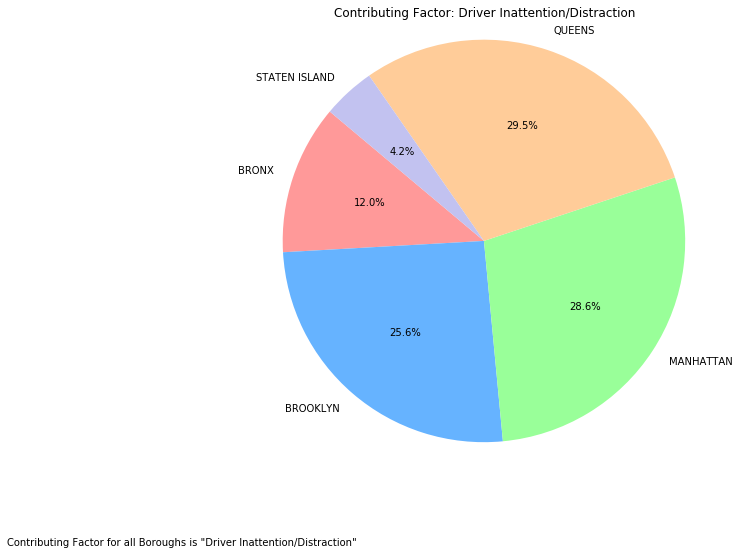

In [78]:
# Data
boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
contributing_factors = ['Driver Inattention/Distraction'] * 5  # All are the same contributing factor
counts = [29952, 63866, 71360, 73704, 10541]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=boroughs, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Add a title and a note
plt.title('Contributing Factor: Driver Inattention/Distraction')
plt.text(-1.5, -1.5, 'Contributing Factor for all Boroughs is "Driver Inattention/Distraction"', 
         horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# Show the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# 2) Zaprezentowanie, ile zgonów oraz obrażeń zostało spowodowanych przez szybką jazdę w danej dzielnicy

In [79]:
# narrowing the columns scope to clean the data
selected_columns = ['BOROUGH', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',]
df_t2 = dataframe[selected_columns]
df_t2.head(10)

,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,QUEENS,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN
1,BROOKLYN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN
2,MANHATTAN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
3,BRONX,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN
4,MANHATTAN,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN
5,BROOKLYN,1.0,0.0,0,0,1,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN
6,QUEENS,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN
7,NaN,0.0,1.0,0,0,0,0,0,1,Unsafe Speed,Unspecified,NaN,NaN,NaN
8,QUEENS,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN
9,BRONX,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN


In [81]:
# List of contributing factor columns
contributing_factors = [
    "CONTRIBUTING FACTOR VEHICLE 1",
    "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3",
    "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]

# Columns to sum for injuries and fatalities
injury_columns = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF MOTORIST INJURED"
]

fatality_columns = [
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLIST KILLED",
    "NUMBER OF MOTORIST KILLED"
]

# Filter rows where "Unsafe Speed" appears in any contributing factor column
filtered_df_t2 = df_t2[df_t2[contributing_factors].eq("Unsafe Speed").any(axis=1)]

# Group by BOROUGH and sum injuries and fatalities separately
grouped_filtered_df_t2 = filtered_df_t2.groupby("BOROUGH")

injuries_sum = grouped_filtered_df_t2[injury_columns].sum().sum(axis=1).rename("TOTAL INJURIES")
fatalities_sum = grouped_filtered_df_t2[fatality_columns].sum().sum(axis=1).rename("TOTAL FATALITIES")

# Combine the sums into a single DataFrame
result = pd.concat([injuries_sum, fatalities_sum], axis=1)

# Add a column for the total of both injuries and fatalities
result["TOTAL INJURED AND KILLED"] = result["TOTAL INJURIES"] + result["TOTAL FATALITIES"]

# Reset index for better readability
result_df_t2 = result.reset_index()

# Display the result
print(result_df_t2)

         BOROUGH  TOTAL INJURIES  TOTAL FATALITIES  TOTAL INJURED AND KILLED
0          BRONX          2206.0              10.0                    2216.0
1       BROOKLYN          3609.0              39.0                    3648.0
2      MANHATTAN           982.0               6.0                     988.0
3         QUEENS          2939.0              56.0                    2995.0
4  STATEN ISLAND           558.0               4.0                     562.0


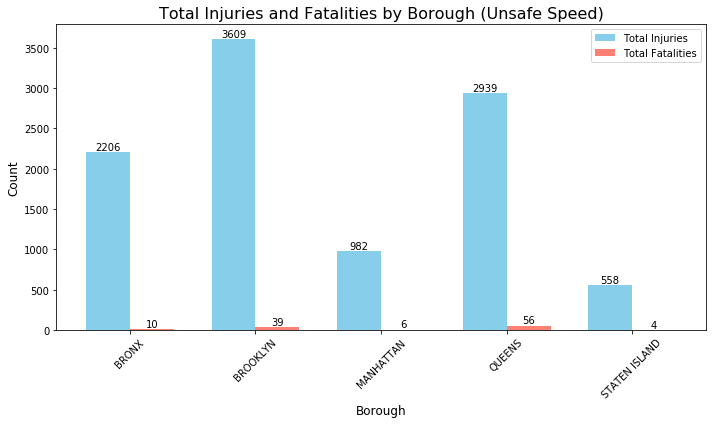

In [82]:
# Data for the bar chart
boroughs = result_df_t2["BOROUGH"]
injuries = result_df_t2["TOTAL INJURIES"]
fatalities = result_df_t2["TOTAL FATALITIES"]

# Set positions for the bars
x = np.arange(len(boroughs))  # Position of boroughs on the x-axis
bar_width = 0.35  # Width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot injuries and fatalities
bars1 = ax.bar(x - bar_width / 2, injuries, bar_width, label="Total Injuries", color="skyblue")
bars2 = ax.bar(x + bar_width / 2, fatalities, bar_width, label="Total Fatalities", color="salmon")

# Add labels, title, and legend
ax.set_title("Total Injuries and Fatalities by Borough (Unsafe Speed)", fontsize=16)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(boroughs, rotation=45, fontsize=10)
ax.legend(fontsize=10)

# Add data labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", 
                ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

# 3) Określenie 3 najczęstszych czynników wypadków z podziałem na dzielnice oraz ogółem dla całego miasta

In [83]:
# narrowing the columns scope to clean the data
selected_columns = ['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',]
df_t3 = dataframe[selected_columns]
df_t3.head(10)

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,QUEENS,Passing Too Closely,Unspecified,NaN,NaN,NaN
1,BROOKLYN,Passing Too Closely,Unspecified,NaN,NaN,NaN
2,MANHATTAN,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
3,BRONX,Unspecified,Unspecified,NaN,NaN,NaN
4,MANHATTAN,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN
5,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN
6,QUEENS,Unspecified,NaN,NaN,NaN,NaN
7,NaN,Unsafe Speed,Unspecified,NaN,NaN,NaN
8,QUEENS,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN
9,BRONX,Unspecified,NaN,NaN,NaN,NaN


In [84]:
# Remove NaN values and merge all factor columns
df_t3_clean = df_t3.melt(id_vars=['BOROUGH'], value_vars=['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                                                   'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 
                                                   'CONTRIBUTING FACTOR VEHICLE 5'], var_name='Factor', value_name='Contributing Factor')

# Remove rows with NaN values in 'Contributing Factor' and filter out 'Unspecified'
df_t3_clean = df_t3_clean.dropna(subset=['Contributing Factor'])
df_t3_clean = df_t3_clean[df_t3_clean['Contributing Factor'] != 'Unspecified']

# Count the occurrences of each contributing factor per borough
contributing_factor_counts = df_t3_clean.groupby(['BOROUGH', 'Contributing Factor']).size().reset_index(name='Count')

# For each borough, find the top 3 contributing factors
top_3_factors = contributing_factor_counts.groupby('BOROUGH').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Display the result
print(top_3_factors)

          BOROUGH             Contributing Factor  Count
0           BRONX  Driver Inattention/Distraction  29952
1           BRONX                 Other Vehicular  10775
2           BRONX   Failure to Yield Right-of-Way   7923
3        BROOKLYN  Driver Inattention/Distraction  63866
4        BROOKLYN   Failure to Yield Right-of-Way  25114
5        BROOKLYN                Backing Unsafely  15665
6       MANHATTAN  Driver Inattention/Distraction  71360
7       MANHATTAN                 Other Vehicular  28102
8       MANHATTAN   Failure to Yield Right-of-Way  14803
9          QUEENS  Driver Inattention/Distraction  73704
10         QUEENS   Failure to Yield Right-of-Way  27953
11         QUEENS                Backing Unsafely  16784
12  STATEN ISLAND  Driver Inattention/Distraction  10541
13  STATEN ISLAND   Failure to Yield Right-of-Way   3227
14  STATEN ISLAND                Backing Unsafely   2447


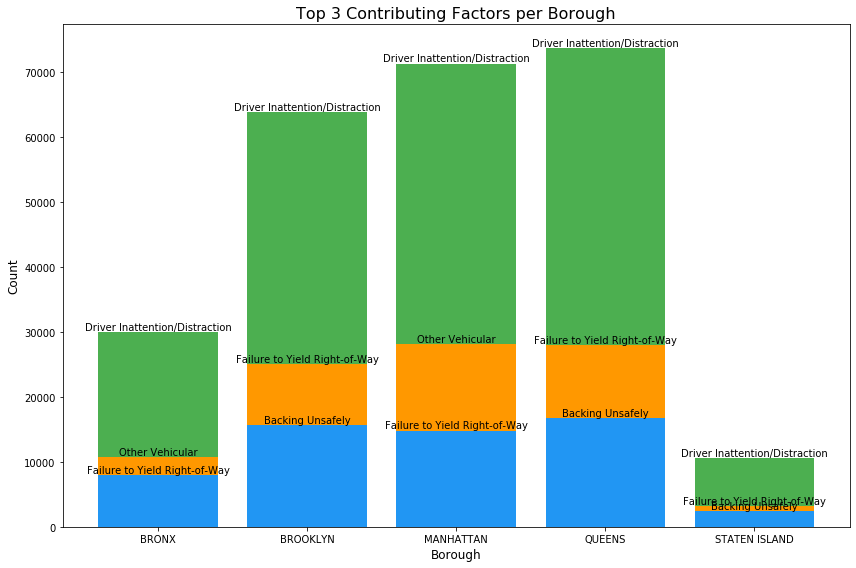

In [85]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Step 1: Plot the bar chart with Borough on X axis and Count on Y axis
bars = plt.bar(top_3_factors['BOROUGH'], top_3_factors['Count'], color=['#4CAF50', '#FF9800', '#2196F3'])

# Step 2: Add the color-coded labels for the contributing factors
for bar, factor in zip(bars, top_3_factors['Contributing Factor']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, factor, ha='center', va='bottom', fontsize=10)

# Step 3: Add labels and title
plt.title('Top 3 Contributing Factors per Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [86]:
# Remove NaN values and merge all factor columns
df_t3_clean_NY = df_t3.melt(id_vars=['BOROUGH'], value_vars=['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                                                   'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 
                                                   'CONTRIBUTING FACTOR VEHICLE 5'], var_name='Factor', value_name='Contributing Factor')

# Remove rows with NaN values in 'Contributing Factor' and filter out 'Unspecified'
df_t3_clean_NY = df_t3_clean_NY.dropna(subset=['Contributing Factor'])
df_t3_clean_NY = df_t3_clean_NY[df_t3_clean_NY['Contributing Factor'] != 'Unspecified']

# Aggregate all boroughs as 'New York'
df_t3_clean_NY['BOROUGH'] = 'New York'

# Count the occurrences of each contributing factor for New York
contributing_factor_counts = df_t3_clean_NY.groupby(['BOROUGH', 'Contributing Factor']).size().reset_index(name='Count')

# Find the top 3 contributing factors for New York
top_3_factors_new_york = contributing_factor_counts.nlargest(3, 'Count').reset_index(drop=True)

# Display the result
print(top_3_factors_new_york)

    BOROUGH             Contributing Factor   Count
0  New York  Driver Inattention/Distraction  374570
1  New York   Failure to Yield Right-of-Way  105739
2  New York           Following Too Closely   93248


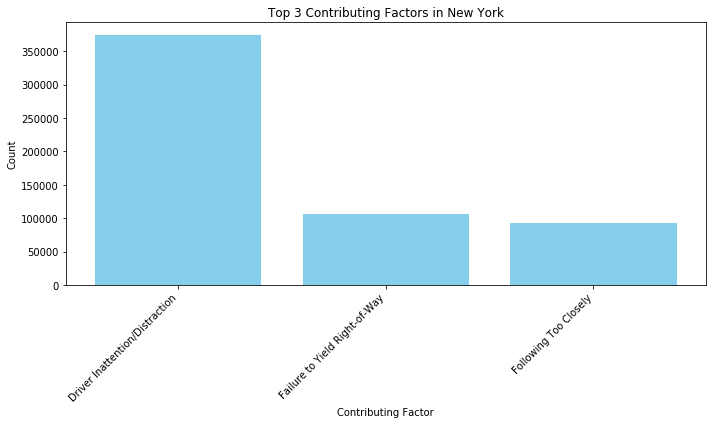

In [87]:
# Visualization for the top 3 contributing factors for New York

# Create a bar plot for the top 3 contributing factors
plt.figure(figsize=(10, 6))

# Bar plot for top 3 contributing factors
plt.bar(top_3_factors_new_york['Contributing Factor'], top_3_factors_new_york['Count'], color='skyblue')

# Adding labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.title('Top 3 Contributing Factors in New York')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

# 4) Określenie jakie pojazdy najczęściej uczestniczyły w wypadkach

In [88]:
# narrowing the columns scope to clean the data

selected_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df_t4 = dataframe[selected_columns]
df_t4.head(10)

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,Sedan,Pick-up Truck,NaN,NaN,NaN
1,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,Sedan,NaN,NaN,NaN,NaN
3,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
5,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
6,Sedan,NaN,NaN,NaN,NaN
7,Motorcycle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
8,Pick-up Truck,Pick-up Truck,NaN,NaN,NaN
9,Sedan,NaN,NaN,NaN,NaN


In [89]:
# Merge all columns into one new column
df_t4_melted = df_t4.melt(value_vars=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], 
                    value_name='Vehicle Name')

# Remove NaN and 'Unspecified' values
df_t4_filtered = df_t4_melted.dropna(subset=['Vehicle Name'])  # Remove NaN
df_t4_filtered = df_t4_filtered[df_t4_filtered['Vehicle Name'] != 'UNKNOWN']  # Remove 'Unspecified'

# Count occurrences of each vehicle type
vehicle_counts = df_t4_filtered['Vehicle Name'].value_counts().reset_index()
vehicle_counts.columns = ['Vehicle Type', 'Count']

# Display the result
print(vehicle_counts)

                            Vehicle Type    Count
0                      PASSENGER VEHICLE  1338214
1          SPORT UTILITY / STATION WAGON   611527
2                                  Sedan   283174
3    Station Wagon/Sport Utility Vehicle   233586
4                                   TAXI    99960
..                                   ...      ...
884                                scava        1
885                                Pedic        1
886                                   na        1
887                                   EB        1
888                                Refri        1

[889 rows x 2 columns]


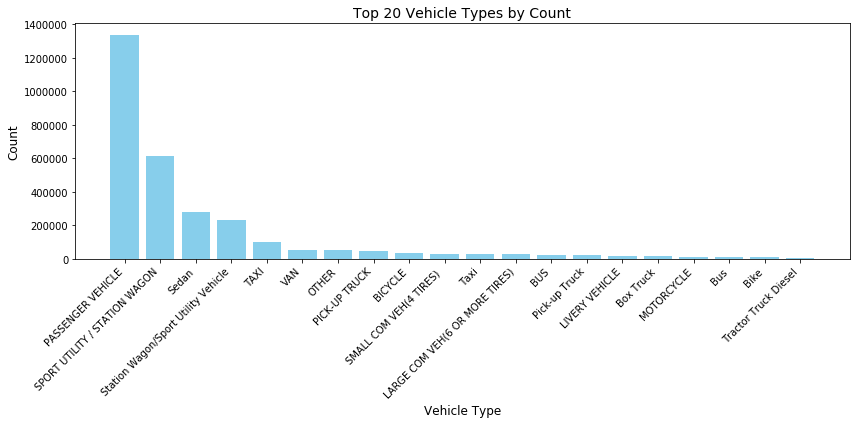

In [90]:
# Get the top 20 vehicle types
top_20_vehicles = vehicle_counts.head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_vehicles['Vehicle Type'], top_20_vehicles['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 20 Vehicle Types by Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# 5) Statystyka ilości wypadków dla każdej z dzielnic

In [91]:
# narrowing the columns scope to clean the data
selected_columns = ['BOROUGH', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED',]
df_t5 = dataframe[selected_columns]
df_t5.head(10)

,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED
0,QUEENS,0.0,0.0,0,0,0,0
1,BROOKLYN,0.0,0.0,0,0,0,0
2,MANHATTAN,1.0,0.0,0,0,0,0
3,BRONX,0.0,0.0,0,0,0,0
4,MANHATTAN,1.0,0.0,0,0,1,0
5,BROOKLYN,1.0,0.0,0,0,1,0
6,QUEENS,0.0,0.0,0,0,0,0
7,NaN,0.0,1.0,0,0,0,0
8,QUEENS,0.0,0.0,0,0,0,0
9,BRONX,0.0,0.0,0,0,0,0


In [92]:
# Assuming accident is when there are any casualties and injuries

# Calculate the sum of the last six columns
df_t5['Total Casualties/Injuries'] = df_t5.iloc[:, 1:].sum(axis=1)

# Add "Accident" column
df_t5['Accident'] = df_t5['Total Casualties/Injuries'].apply(lambda x: "accident" if x > 0 else "")

# Preview the data
df_t5.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,Total Casualties/Injuries,Accident
0,QUEENS,0.0,0.0,0,0,0,0,0.0,
1,BROOKLYN,0.0,0.0,0,0,0,0,0.0,
2,MANHATTAN,1.0,0.0,0,0,0,0,1.0,accident
3,BRONX,0.0,0.0,0,0,0,0,0.0,
4,MANHATTAN,1.0,0.0,0,0,1,0,2.0,accident
5,BROOKLYN,1.0,0.0,0,0,1,0,2.0,accident
6,QUEENS,0.0,0.0,0,0,0,0,0.0,
7,NaN,0.0,1.0,0,0,0,0,1.0,accident
8,QUEENS,0.0,0.0,0,0,0,0,0.0,
9,BRONX,0.0,0.0,0,0,0,0,0.0,


In [93]:
# Count accidents per borough
borough_accidents = df_t5[df_t5['Accident'] == 'accident'].groupby('BOROUGH').size().reset_index(name='Accident Count')

# Display the table
print(borough_accidents)

         BOROUGH  Accident Count
0          BRONX           32385
1       BROOKLYN           75875
2      MANHATTAN           39687
3         QUEENS           58406
4  STATEN ISLAND            8964


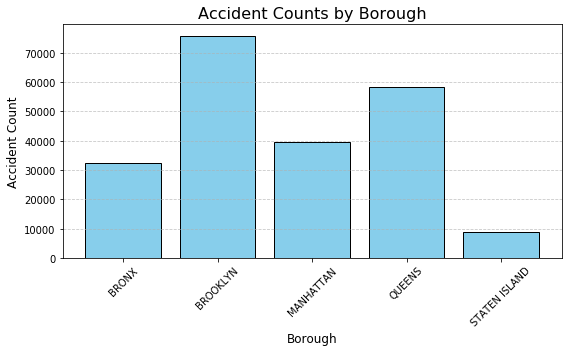

In [94]:
# Data for the chart
x = borough_accidents['BOROUGH']
y = borough_accidents['Accident Count']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.title('Accident Counts by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

# *6) Najczęstsze miejsca wystąpienia wypadków (opcjonalnie)

In [95]:
# narrowing the columns scope to clean the data
selected_columns = ['ZIP CODE','NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']

df_t6 = dataframe[selected_columns]

# Assuming accident is when there are any casualties and injuries

# Calculate the sum of the last six columns
df_t6['Total Casualties/Injuries'] = df_t6.iloc[:, 1:].sum(axis=1)

# Add "Accident" column
df_t6['Accident'] = df_t6['Total Casualties/Injuries'].apply(lambda x: "accident" if x > 0 else "")

# Count accidents per borough
zip_code_accidents = df_t6[df_t6['Accident'] == 'accident'].groupby('ZIP CODE').size().reset_index(name='Accident Count')

# Sort by Accident Count in descending order
zip_code_accidents = zip_code_accidents.sort_values(by='Accident Count', ascending=False)

# Display the table
print(zip_code_accidents)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


    ZIP CODE  Accident Count
125    11207            2844
153    11236            2260
121    11203            2204
144    11226            2046
319    11207            2009
..       ...             ...
255    10106               1
64     10174               1
40     10048               1
39     10041               1
251    10048               1

[404 rows x 2 columns]


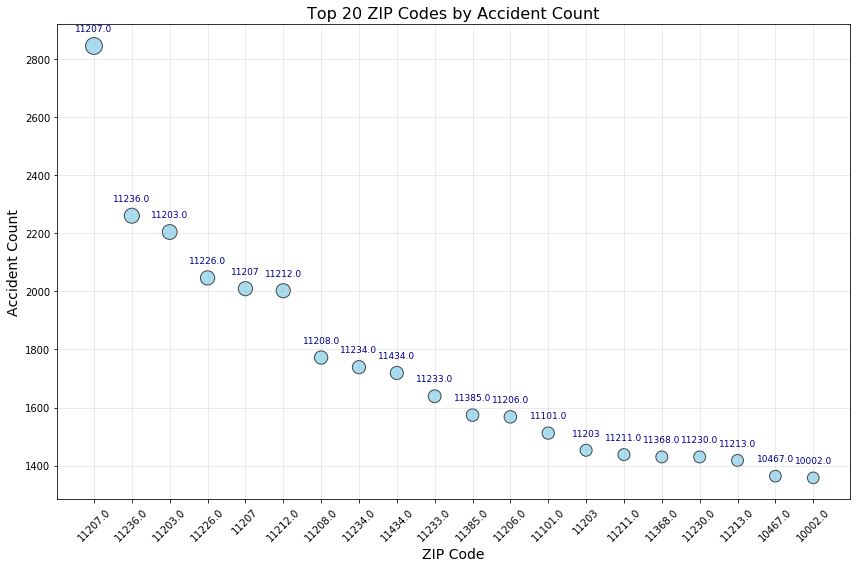

In [96]:
# Ensure ZIP CODE is treated as a string for consistent plotting
zip_code_accidents['ZIP CODE'] = zip_code_accidents['ZIP CODE'].astype(str)

# Filter the top 20 ZIP codes with the highest accident counts
top_20 = zip_code_accidents.nlargest(20, 'Accident Count')

# Bubble chart
plt.figure(figsize=(12, 8))
bubble_sizes = top_20['Accident Count'] * 0.1  # Adjust bubble size for better visualization
plt.scatter(top_20['ZIP CODE'], top_20['Accident Count'], s=bubble_sizes, alpha=0.7, color='skyblue', edgecolors='black')

# Add ZIP code labels
for i, row in top_20.iterrows():
    plt.text(row['ZIP CODE'], row['Accident Count'] + 50, str(row['ZIP CODE']), 
             horizontalalignment='center', fontsize=9, color='darkblue')

# Chart details
plt.title('Top 20 ZIP Codes by Accident Count', fontsize=16)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Wnioski:

Wnioski z analizy wypadków w Nowym Jorku:

Główne przyczyny wypadków:
Driver Inattention/Distraction to zdecydowanie najczęstszy czynnik powodujący wypadki we wszystkich dzielnicach Nowego Jorku.
Unsafe Speed ma marginalne znaczenie w Brooklynie i Staten Island, ale w pozostałych dzielnicach odgrywa większą rolę.
Inne istotne czynniki to Failure to Yield Right-of-Way oraz Following Too Closely, które regularnie pojawiają się w trójce najczęstszych przyczyn.
Rodzaje pojazdów uczestniczących w wypadkach:
Najwięcej wypadków dotyczy samochodów osobowych, w tym SUV-ów, sedanów oraz aut rodzinnych typu kombi.
Rozkład wypadków w dzielnicach:
Największą liczbę wypadków odnotowano w Brooklynie, który jest najbardziej obciążoną dzielnicą pod względem ruchu drogowego.
Na drugim miejscu znajduje się Queens.
Staten Island wyróżnia się najmniejszą liczbą zdarzeń drogowych, co może wynikać z mniejszej gęstości zaludnienia i ruchu.